# Valentina Malagon

Las bases de datos de Home Credit fueron creadas por una empresa de servicios financieros no bancarios que brinda préstamos a personas que normalmente no tienen acceso a servicios bancarios tradicionales. La base de datos incluye información sobre clientes potenciales y actuales, así como detalles sobre sus préstamos, pagos y otros factores relacionados con la capacidad de pago.

El objetivo de la base de datos es ayudar a la empresa a evaluar la solvencia de los clientes y determinar su capacidad para pagar préstamos futuros. Los datos incluyen información sobre la educación, el empleo, el estado civil, la edad y otros factores que pueden influir en la capacidad de pago.

La base de datos ha sido utilizada por investigadores y científicos de datos para desarrollar modelos de aprendizaje automático que puedan predecir la probabilidad de que un cliente no pueda pagar su préstamo. Estos modelos pueden ayudar a la empresa a tomar decisiones informadas sobre quiénes son los clientes más adecuados para recibir préstamos y en qué condiciones.

La base de datos de Home Credit se ha utilizado como un conjunto de datos de referencia en varias competiciones de aprendizaje automático, incluida la competencia de Kaggle Home Credit Default Risk.

# Cargar los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from google.colab import drive
drive.mount('/content/drive')
application_train=pd.read_csv("drive/MyDrive/Ciencia de datos/application_train.csv")
bureau=pd.read_csv("drive/MyDrive/Ciencia de datos/bureau.csv")
credit_card_balance=pd.read_csv("drive/MyDrive/Ciencia de datos/credit_card_balance.csv")
installments_payments=pd.read_csv("drive/MyDrive/Ciencia de datos/installments_payments.csv")
previous_application=pd.read_csv("drive/MyDrive/Ciencia de datos/previous_application.csv")
sample_submission=pd.read_csv("drive/MyDrive/Ciencia de datos/sample_submission.csv")

Mounted at /content/drive


# 1.1 Revision de train

In [2]:
#Revisamos la forma del dataframe
application_train.shape

(307511, 122)

In [3]:
application_train.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
#Ver cuantos valores  y entradas unicas tenemos en la base de datos 
application_train.drop_duplicates(inplace=True)
print(application_train.shape)
len(application_train.SK_ID_CURR.unique())

(307511, 122)


307511

In [5]:
#Las variables que son dias en train las volvemos años
application_train["YEARS"]=-application_train.DAYS_BIRTH/360
application_train["YEARS_EMPLOYED"]=-application_train.DAYS_EMPLOYED/360
application_train["YEARS_REGISTRATION"]=-application_train.DAYS_REGISTRATION/360

In [6]:
#Creamos nuevas variables que sean mas informativas 
application_train['DAYS_EMPLOYED_PERC'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']
application_train['INCOME_CREDIT_PERC'] = application_train['AMT_INCOME_TOTAL'] / application_train['AMT_CREDIT']
application_train['INCOME_PER_PERSON'] = application_train['AMT_INCOME_TOTAL'] / application_train['CNT_FAM_MEMBERS']
application_train['ANNUITY_INCOME_PERC'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']

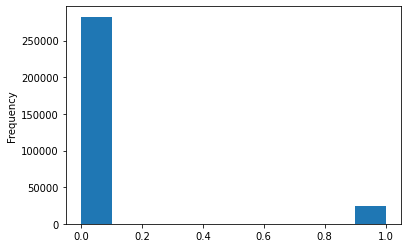

In [7]:
application_train['TARGET'].astype(int).plot.hist();

En primer lugar vale la pena resaltar que la variable objetivo tiene una distribucion muy desigual pues casi el 90% de los datos tienen un resultado de 0, lo cual indica que no hubo default 

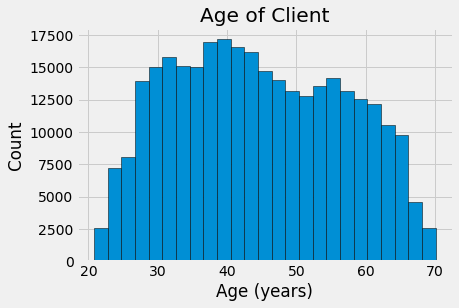

In [8]:
#Hacemos un grafico de distibucion de edades 
plt.style.use('fivethirtyeight')

plt.hist(application_train['YEARS'], edgecolor = 'k', bins=25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [9]:
#Correlacion entre la variable objetivo y la edad 
application_train['YEARS'].corr(application_train['TARGET'])

-0.0782393083098267

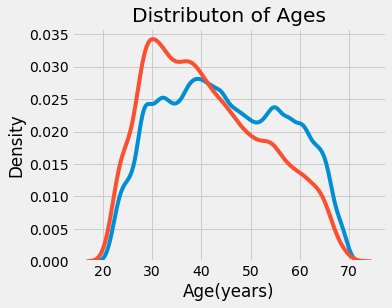

In [10]:
#Grafico distribucion de edad y la variable objetivo 
plt.figure(figsize=(5,4))
sns.kdeplot(application_train.loc[application_train['TARGET'] ==0, 'YEARS'], label='target ==0')
sns.kdeplot(application_train.loc[application_train['TARGET'] ==1, 'YEARS'], label='target ==1')
plt.xlabel('Age(years)'); plt.ylabel('Density'); plt.title('Distributon of Ages');

# Insights #1
La mayor cantidad de aplicantes se encuentran entre 30 y 45 años sin embargo, y es contra intuitivo, la relacion entre la edad realmente no esta muy correlacionada con la variable objetivo. Incluso tienen una relacion negativa y muy baja. Se puede llegar a interpretar es una diferencia significativa entre entrar en default o no al rededor de los 23 a 38 años y nuevamente se observa una separacion en la grafica de las lineas roja y azul entre los 55 y los 64

In [11]:
#Correlacion en todo el dataframne de train 
correlations = application_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
DAYS_EMPLOYED_PERC             0.042206
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
YEARS_EMPLOYED                 0.044932
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
YEARS                        -0.078239
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


# Insights #2
Realmente ninguna variable por si sola explica, o va en contra, de manera fuerte de la variable objetivo. De todo el modelo y los datos proporcionados de train la variable que mejor explica los resultados fueron EXT_SOURCE_1,2,3 que pertenecen al estudio hecho por otras instituciones sobre las personas 

In [12]:
#Funcion para cramer 
import scipy.stats as ss
def cramers_v(x, y):
     confusion_matrix = pd.crosstab(x,y)
     chi2 = ss.chi2_contingency(confusion_matrix)[0]
     n = confusion_matrix.sum().sum()
     phi2 = chi2/n
     r,k = confusion_matrix.shape
     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
     rcorr = r-((r-1)**2)/(n-1)
     kcorr = k-((k-1)**2)/(n-1)
     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cramersv_dataframe_target(dataframe,nameTarget):
    df = pd.DataFrame(columns=['v_cramer'],index=dataframe.columns.tolist())
    for col in dataframe.columns.tolist():
         print('V de Cramer para {}: '.format(col) + format(round(cramers_v(dataframe[col],dataframe[nameTarget]),3)))
         df.loc[col,'v_cramer'] = round(cramers_v(dataframe[col],dataframe[nameTarget]),3)
    return df

In [13]:
c=cramersv_dataframe_target(application_train,"TARGET");
print('Most Positive Correlations:\n', c.tail(15))
print('Most Negative Correlations:\n', c.head(15))

<ipython-input-12-49dd6abed22c>:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


V de Cramer para SK_ID_CURR: inf
V de Cramer para TARGET: 1.0
V de Cramer para NAME_CONTRACT_TYPE: 0.031
V de Cramer para CODE_GENDER: 0.055
V de Cramer para FLAG_OWN_CAR: 0.022
V de Cramer para FLAG_OWN_REALTY: 0.006
V de Cramer para CNT_CHILDREN: 0.024
V de Cramer para AMT_INCOME_TOTAL: 0.0
V de Cramer para AMT_CREDIT: 0.118
V de Cramer para AMT_ANNUITY: 0.147
V de Cramer para AMT_GOODS_PRICE: 0.095
V de Cramer para NAME_TYPE_SUITE: 0.009
V de Cramer para NAME_INCOME_TYPE: 0.064
V de Cramer para NAME_EDUCATION_TYPE: 0.057
V de Cramer para NAME_FAMILY_STATUS: 0.04
V de Cramer para NAME_HOUSING_TYPE: 0.037
V de Cramer para REGION_POPULATION_RELATIVE: 0.073
V de Cramer para DAYS_BIRTH: 0.074
V de Cramer para DAYS_EMPLOYED: 0.0
V de Cramer para DAYS_REGISTRATION: 0.0
V de Cramer para DAYS_ID_PUBLISH: 0.051
V de Cramer para OWN_CAR_AGE: 0.059
V de Cramer para FLAG_MOBIL: 0.0
V de Cramer para FLAG_EMP_PHONE: 0.046
V de Cramer para FLAG_WORK_PHONE: 0.028
V de Cramer para FLAG_CONT_MOBILE: 0


Realmente ninguna variable categorica por si sola explica, o va en contra, de manera fuerte de la variable objetivo.

In [14]:
application_train.groupby(['OCCUPATION_TYPE'])['DAYS_EMPLOYED'].mean()

OCCUPATION_TYPE
Accountants             -2394.102823
Cleaning staff          -1973.247152
Cooking staff           -2152.466868
Core staff              -2797.755967
Drivers                 -1939.034618
HR staff                -2278.866785
High skill tech staff   -2739.979086
IT staff                -2095.570342
Laborers                -2424.143152
Low-skill Laborers      -1664.186813
Managers                -2759.318937
Medicine staff          -3750.265550
Private service staff   -2238.281297
Realty agents           -1785.003995
Sales staff             -1703.789421
Secretaries             -2607.050575
Security staff          -1904.809106
Waiters/barmen staff    -1873.172849
Name: DAYS_EMPLOYED, dtype: float64

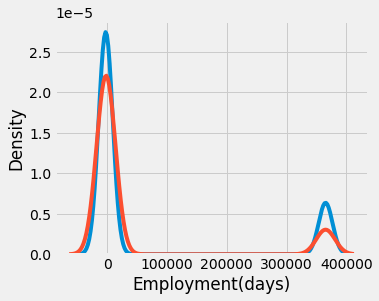

In [15]:
plt.figure(figsize=(5,4))
sns.kdeplot(application_train.loc[application_train['TARGET'] ==0, 'DAYS_EMPLOYED'], label='target ==0')
sns.kdeplot(application_train.loc[application_train['TARGET'] ==1, 'DAYS_EMPLOYED'], label='target ==1')
plt.xlabel('Employment(days)'); plt.ylabel('Density'); plt.title('');

# Insights #3
Dependiendo de la ocupacion del aplicante se tienen diferentes promedios y durabilidades en los puestos de trabajo. Y al ser empleados por mas tiempo se podria llegar a pensar que hay profesiones que tienen mas posibilidades de entrar en default; como los meseros, bartenders, los de seguridad y los conductores y los agentes inmobiliarios

In [16]:
#Seleccionamos las variables con las que vamos a trabajar 
train =application_train[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR',"OWN_CAR_AGE", 'FLAG_OWN_REALTY', 
                          'CNT_CHILDREN',"CNT_FAM_MEMBERS", 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY',"NAME_INCOME_TYPE","OCCUPATION_TYPE",
                          "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","YEARS","YEARS_EMPLOYED"
                          ,"YEARS_REGISTRATION",'DAYS_EMPLOYED_PERC',"INCOME_CREDIT_PERC",'INCOME_PER_PERSON','ANNUITY_INCOME_PERC']]
train.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC
0,100002,1,Cash loans,M,N,NaN,Y,0,1.0,202500.0,406597.5,24700.5,Working,Laborers,Secondary / secondary special,Single / not married,0.083037,0.262949,0.139376,26.280556,1.769444,10.133333,0.067329,0.498036,202500.0,0.121978


In [17]:
#Con que tipos de datos estamos trabajando
train.dtypes.value_counts()

float64    15
object      8
int64       3
dtype: int64

In [18]:
train.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        8
OCCUPATION_TYPE        18
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
dtype: int64

In [19]:
#Ver cuantos valores nulos tenemos en las variables 
train.isna().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
OWN_CAR_AGE            202929
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
CNT_FAM_MEMBERS             2
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
NAME_INCOME_TYPE            0
OCCUPATION_TYPE         96391
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
EXT_SOURCE_1           173378
EXT_SOURCE_2              660
EXT_SOURCE_3            60965
YEARS                       0
YEARS_EMPLOYED              0
YEARS_REGISTRATION          0
DAYS_EMPLOYED_PERC          0
INCOME_CREDIT_PERC          0
INCOME_PER_PERSON           2
ANNUITY_INCOME_PERC        12
dtype: int64

<AxesSubplot:>

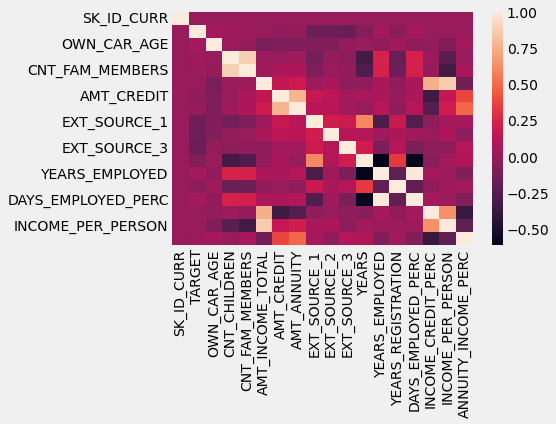

In [20]:
corr=train.corr()
sns.heatmap(corr)

In [21]:
#x = train.groupby(['CODE_GENDER',"AMT_ANNUITY"]).agg(tasa_default=('TARGET','mean')).reset_index()
#sns.barplot(data=x,x='CODE_GENDER',y='tasa_default',hue="AMT_ANNUITY")

# 1.2 Revision de bureau
Todos los créditos anteriores del cliente proporcionados por otras instituciones financieras que se notificaron a Credit Bureau (para clientes que tienen un préstamo en nuestra muestra).
Por cada préstamo de nuestra muestra, hay tantas filas como créditos tenía el cliente en el Buró de Crédito antes de la fecha de solicitud.

In [22]:
bureau.head(1)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN


In [23]:
print(bureau.shape)
print(len(bureau.SK_ID_CURR.unique()))

(1716428, 17)
305811


In [24]:
#Sacar la suma de todos los creditos activos de una persona 
bureau["CREDIT_SUM"]=bureau.AMT_CREDIT_SUM
bureau_t1=bureau.loc[bureau.CREDIT_ACTIVE=="Active"].groupby("SK_ID_CURR").agg(AMT_CREDIT_SUM2=("CREDIT_SUM","sum")).reset_index()
bureau_t1.head(1)

,SK_ID_CURR,AMT_CREDIT_SUM2
0,100001,884025.0


In [25]:
#Unimos la variable nueva a train
train1 = pd.merge(train,bureau_t1,on='SK_ID_CURR',how='left')
train1.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,AMT_CREDIT_SUM2
0,100002,1,Cash loans,M,N,NaN,Y,0,1.0,202500.0,406597.5,24700.5,Working,Laborers,Secondary / secondary special,Single / not married,0.083037,0.262949,0.139376,26.280556,1.769444,10.133333,0.067329,0.498036,202500.0,0.121978,481988.565


In [26]:
##Sacar la suma de la cantidad de creditos activos que debe una persona 
bureau["CREDIT_SUM_DEBT"]=bureau.AMT_CREDIT_SUM_DEBT
bureau_t2=bureau.loc[bureau.CREDIT_ACTIVE=="Active"].groupby("SK_ID_CURR").agg(AMT_CREDIT_SUM_DEBT2=("CREDIT_SUM_DEBT","sum")).reset_index()
bureau_t2.head(1)

,SK_ID_CURR,AMT_CREDIT_SUM_DEBT2
0,100001,596686.5


In [27]:
#Unimos la variable nueva a train
train2 = pd.merge(train1,bureau_t2,on='SK_ID_CURR',how='left')
train2.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,AMT_CREDIT_SUM2,AMT_CREDIT_SUM_DEBT2
0,100002,1,Cash loans,M,N,NaN,Y,0,1.0,202500.0,406597.5,24700.5,Working,Laborers,Secondary / secondary special,Single / not married,0.083037,0.262949,0.139376,26.280556,1.769444,10.133333,0.067329,0.498036,202500.0,0.121978,481988.565,245781.0


# 1.3 Revision installments_payments
Historial de reembolso de los créditos desembolsados anteriormente en Home Credit relacionados con los préstamos de nuestra muestra.
Hay a) una fila por cada pago efectuado y b) una fila por cada pago no efectuado.
Una fila equivale a un pago de una cuota O una cuota correspondiente a un pago de un crédito anterior en Home Credit relacionado con los préstamos de nuestra muestra.

In [28]:
#Creamos variables para el pocentaje pagado, la diferencia en los pagos, dias de mora y dias de pago anticipado
installments_payments['PERCENTAGE_PAID'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']
installments_payments['DAYS_OVERDUE'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['DAYS_BEFORE_DUE'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
#Esto es para que si el valor da positivo se queda igual, pero si es negativo lo convierte en cero
installments_payments['DAYS_OVERDUE'] = installments_payments['DAYS_OVERDUE'].apply(lambda x: x if x > 0 else 0)
installments_payments['DAYS_BEFORE_DUE'] = installments_payments['DAYS_BEFORE_DUE'].apply(lambda x: x if x > 0 else 0)

In [29]:
#Creamos dataframe con las nuevas variables 
install1=installments_payments.groupby("SK_ID_CURR").agg(PERCENTAGE_PAID=("PERCENTAGE_PAID","mean"),PAYMENT_DIFF=("PAYMENT_DIFF","mean"),
 DAYS_OVERDUE=("DAYS_OVERDUE","max"), DAYS_BEFORE_DUE=("DAYS_BEFORE_DUE","max")).reset_index()
install1.head(1)

,SK_ID_CURR,PERCENTAGE_PAID,PAYMENT_DIFF,DAYS_OVERDUE,DAYS_BEFORE_DUE
0,100001,1.0,0.0,11.0,36.0


In [30]:
#Unimos la variable nueva a train
train3 = pd.merge(train2,install1,on='SK_ID_CURR',how='left')
train3.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,AMT_CREDIT_SUM2,AMT_CREDIT_SUM_DEBT2,PERCENTAGE_PAID,PAYMENT_DIFF,DAYS_OVERDUE,DAYS_BEFORE_DUE
0,100002,1,Cash loans,M,N,NaN,Y,0,1.0,202500.0,406597.5,24700.5,Working,Laborers,Secondary / secondary special,Single / not married,0.083037,0.262949,0.139376,26.280556,1.769444,10.133333,0.067329,0.498036,202500.0,0.121978,481988.565,245781.0,1.0,0.0,0.0,31.0


# 1.4 Revision credit_card_balance
Instantáneas mensuales de los saldos de los créditos anteriores que el solicitante tiene en Home Credit.
Esta tabla tiene una fila por cada mes de historial de cada crédito anterior en Home Credit (crédito al consumo y préstamos en efectivo) relacionado con los préstamos de nuestra muestra - es decir, la tabla tiene (#préstamos en la muestra * # de tarjetas de crédito anteriores relativas * # de meses en los que tenemos algún historial observable para la tarjeta de crédito anterior) filas.

In [31]:
credit_card_balance.head(1)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.0,0.0,0.0,0.0,1,0.0,1.0,35.0,Active,0,0


In [32]:
print((credit_card_balance).shape)
print(len(credit_card_balance.SK_ID_CURR.unique()))

(3840312, 23)
103558


In [33]:
credit_card_balance["AMT_CREDIT_LIMIT"]=credit_card_balance.AMT_CREDIT_LIMIT_ACTUAL
credit_balance1=credit_card_balance.groupby("SK_ID_CURR").agg(AMT_CREDIT_LIMIT=("AMT_CREDIT_LIMIT","max")).reset_index()
credit_balance1.head(4)

,SK_ID_CURR,AMT_CREDIT_LIMIT
0,100006,270000
1,100011,180000
2,100013,157500
3,100021,675000


In [34]:
train4 = pd.merge(train3,credit_balance1,on='SK_ID_CURR',how='left')
train4.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,AMT_CREDIT_SUM2,AMT_CREDIT_SUM_DEBT2,PERCENTAGE_PAID,PAYMENT_DIFF,DAYS_OVERDUE,DAYS_BEFORE_DUE,AMT_CREDIT_LIMIT
0,100002,1,Cash loans,M,N,NaN,Y,0,1.0,202500.0,406597.5,24700.5,Working,Laborers,Secondary / secondary special,Single / not married,0.083037,0.262949,0.139376,26.280556,1.769444,10.133333,0.067329,0.498036,202500.0,0.121978,481988.565,245781.0,1.0,0.0,0.0,31.0,NaN


# 1.5 Revision previous_application
Todas las solicitudes anteriores de préstamos de crédito vivienda de clientes que tienen préstamos en nuestra muestra.
Hay una fila por cada solicitud anterior relacionada con préstamos de nuestra muestra de datos.

In [35]:
previous_application.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0


In [36]:
print((previous_application).shape)
print(len(previous_application.SK_ID_CURR.unique()))

(1670214, 37)
338857


In [37]:
previous_application["RATE_INTEREST_PRIMARY"]=previous_application.RATE_INTEREST_PRIMARY
previous_application["RATE_INTEREST_PRIVILEGED"]=previous_application.RATE_INTEREST_PRIVILEGED
previous_application1=previous_application.groupby("SK_ID_CURR").agg(RATE_INTEREST_PRIMARY=("RATE_INTEREST_PRIMARY","sum"),
                                                                     RATE_INTEREST_PRIVILEGED=("RATE_INTEREST_PRIVILEGED","sum")).reset_index()
train5 = pd.merge(train4,previous_application1,on='SK_ID_CURR',how='left')
train5.head(1)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,AMT_CREDIT_SUM2,AMT_CREDIT_SUM_DEBT2,PERCENTAGE_PAID,PAYMENT_DIFF,DAYS_OVERDUE,DAYS_BEFORE_DUE,AMT_CREDIT_LIMIT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
0,100002,1,Cash loans,M,N,NaN,Y,0,1.0,202500.0,406597.5,24700.5,Working,Laborers,Secondary / secondary special,Single / not married,0.083037,0.262949,0.139376,26.280556,1.769444,10.133333,0.067329,0.498036,202500.0,0.121978,481988.565,245781.0,1.0,0.0,0.0,31.0,NaN,0.0,0.0


# Revision de outliers y variables categoricas 

In [38]:
train5.set_index('SK_ID_CURR',inplace=True)
train5.head(1)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,AMT_CREDIT_SUM2,AMT_CREDIT_SUM_DEBT2,PERCENTAGE_PAID,PAYMENT_DIFF,DAYS_OVERDUE,DAYS_BEFORE_DUE,AMT_CREDIT_LIMIT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,NaN,Y,0,1.0,202500.0,406597.5,24700.5,Working,Laborers,Secondary / secondary special,Single / not married,0.083037,0.262949,0.139376,26.280556,1.769444,10.133333,0.067329,0.498036,202500.0,0.121978,481988.565,245781.0,1.0,0.0,0.0,31.0,NaN,0.0,0.0


<AxesSubplot:ylabel='YEARS_REGISTRATION'>

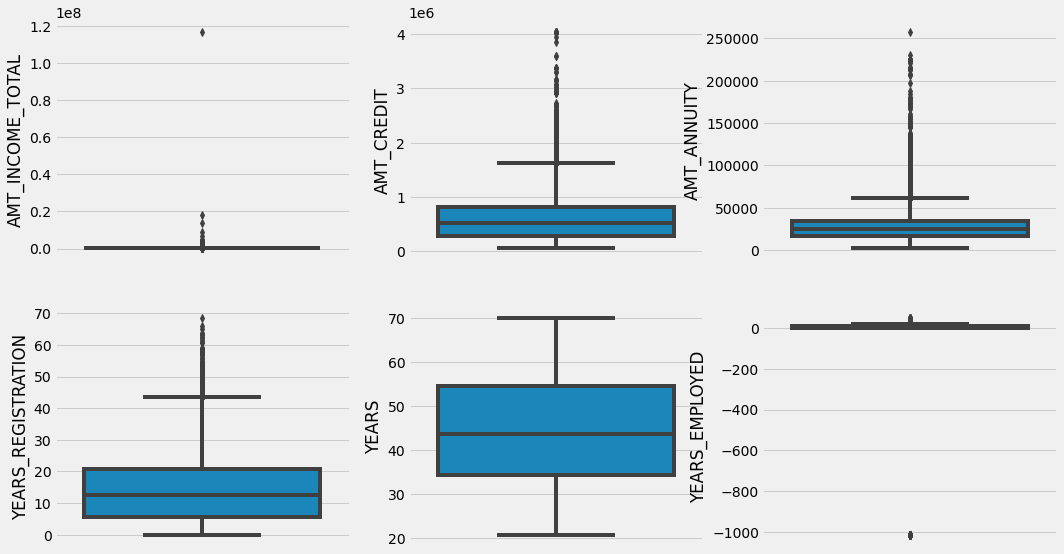

In [39]:
#Para identificar outliers
fig,ax = plt.subplots(2,3,figsize=(16,9))
sns.boxplot(data=application_train,y='AMT_INCOME_TOTAL',ax=ax[0,0])
sns.boxplot(data=application_train,y='AMT_CREDIT',ax=ax[0,1])
sns.boxplot(data=application_train,y='AMT_ANNUITY',ax=ax[0,2])
sns.boxplot(data=application_train,y='YEARS',ax=ax[1,1])
sns.boxplot(data=application_train,y='YEARS_EMPLOYED',ax=ax[1,2])
sns.boxplot(data=application_train,y='YEARS_REGISTRATION',ax=ax[1,0])


In [40]:
lista_col_outliers=["AMT_INCOME_TOTAL","YEARS_EMPLOYED"]

Solo hacemos estas dos variables porque son las que tienen los outliers mas extremos, si corregimos los outliers de las demas podemos es dañar  su distribucion natural y la precision de los resultados 

In [41]:
#Para modificar esos valores outliers 
for columna in lista_col_outliers:
    q1 = train5[columna].quantile(0.25)
    q3 = train5[columna].quantile(0.75)
    iqr = q3-q1 
    limite_arriba = q3 + 1.5*iqr
    limite_abajo = q1 - 1.5*iqr
    mediana = train5.loc[train5[columna]<q3 + 1.5*iqr, columna].median()
    media = train5[columna].mean()
    train5.loc[train5[columna].abs() > limite_arriba,columna] = np.nan
    train5[columna].fillna(limite_arriba, inplace=True)
    train5.loc[train5[columna].abs() < limite_abajo,columna] = np.nan
    train5[columna].fillna(limite_abajo, inplace=True) 

<AxesSubplot:ylabel='YEARS_REGISTRATION'>

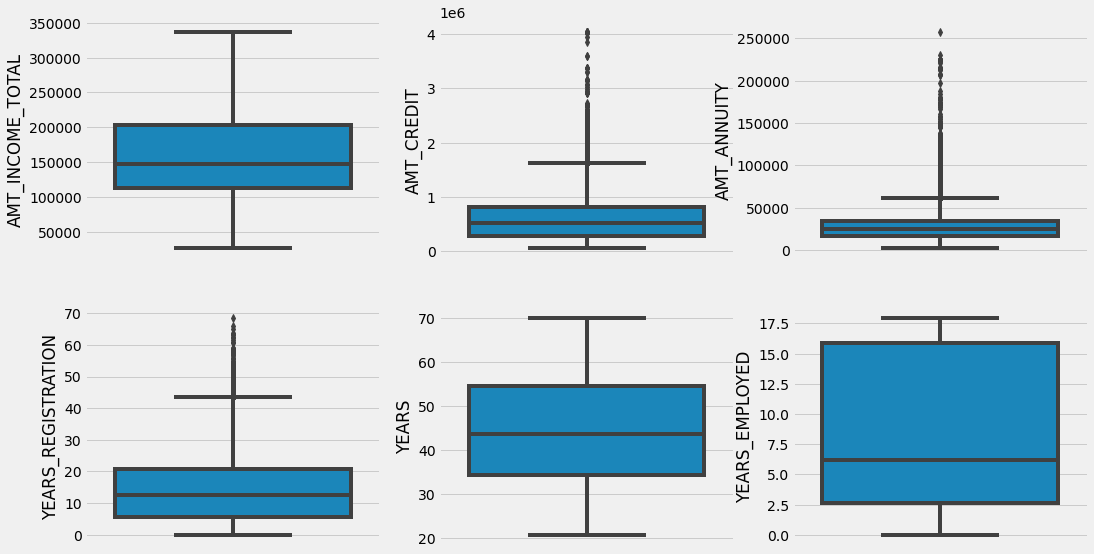

In [42]:
fig,ax = plt.subplots(2,3,figsize=(16,9))
sns.boxplot(data=train5,y='AMT_INCOME_TOTAL',ax=ax[0,0])
sns.boxplot(data=train5,y='AMT_CREDIT',ax=ax[0,1])
sns.boxplot(data=train5,y='AMT_ANNUITY',ax=ax[0,2])
sns.boxplot(data=train5,y='YEARS',ax=ax[1,1])
sns.boxplot(data=train5,y='YEARS_EMPLOYED',ax=ax[1,2])
sns.boxplot(data=train5,y='YEARS_REGISTRATION',ax=ax[1,0])

In [43]:
df_ohe=pd.get_dummies(train5.loc[:,train5.columns!="TARGET"])
df_ohe=pd.merge(df_ohe,train5.loc[:,"TARGET"],left_index=True,right_index=True)
df_ohe.shape

(307511, 72)